# Importing Libraries and Data

In [1]:
#standard imports
import numpy as np
import pandas as pd
#data visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
#statistics imports
from scipy import stats

In [2]:
#saving data as a variable
data = 'https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data'
#importing data as df
df = pd.read_csv(data)
#inspect dataframe
df.head()


State       Lat       Lng      Area  Children  Age    Income   Marital  \
0    AL  34.34960 -86.72508  Suburban       1.0   53  86575.93  Divorced   
1    FL  30.84513 -85.22907     Urban       3.0   51  46805.99   Married   
2    SD  43.54321 -96.63772  Suburban       3.0   53  14370.14   Widowed   
3    MN  43.89744 -93.51479  Suburban       0.0   78  39741.49   Married   
4    VA  37.59894 -76.88958     Rural       1.0   22   1209.56   Widowed   

   Gender  ReAdmis  ...  Hyperlipidemia  BackPain  Anxiety  Allergic_rhinitis  \
0    Male        0  ...             0.0       1.0      1.0                1.0   
1  Female        0  ...             0.0       0.0      0.0                0.0   
2  Female        0  ...             0.0       0.0      0.0                0.0   
3    Male        0  ...             0.0       0.0      0.0                0.0   
4  Female        0  ...             1.0       0.0      0.0                1.0   

   Reflux_esophagitis Asthma     Services  Initial_days  TotalCharge  \
0                   0      1   Blood Work     10.585770  3726.702860   
1                   1      0  Intravenous     15.129562  4193.190458   
2                   0      0   Blood Work      4.772177  2434.234222   
3                   1      1   Blood Work      1.714879  2127.830423   
4                   0      0      CT Scan      1.254807  2113.073274   

   Additional_charges  
0        17939.403420  
1        17612.998120  
2        17505.192460  
3        12993.437350  
4         3716.525786  

[5 rows x 32 columns]

In [4]:
#inspecting duplicate and missing values
print(f'Data contains {df.duplicated().sum()} duplicate rows')
print(f'Data contains {df.isna().sum().sum()} missing values')

Data contains 0 duplicate rows
Data contains 72 missing values


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

# Vitamin D Level Analysis

In [11]:
#creating variables VitD_level feature with Mean, Median, and STD
vitamin_d = df['VitD_levels'].copy()
mean = vitamin_d.mean()
median = vitamin_d.median()
std = vitamin_d.std()
plus_one_std = mean + std
minus_one_std = mean - std


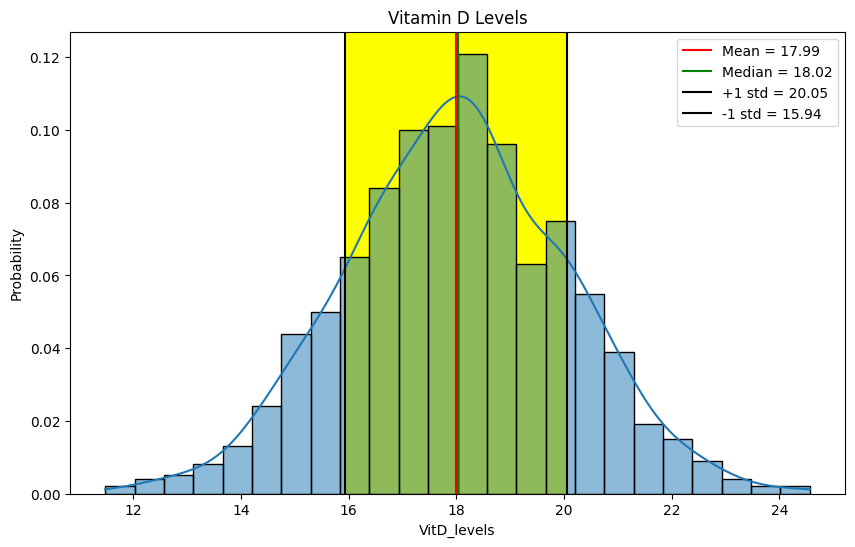

In [22]:
#plotting histogram to inspect distribution 
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(vitamin_d, ax=ax, stat='probability', kde=True)
ax.axvline(mean, color='red', label=f'Mean = {mean:,.2f}')
ax.axvline(median, color='green', label=f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color='black', label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color='black', label=f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder=0)
ax.set_title('Vitamin D Levels')
ax.legend();

  ### Is it Discrete or Continuous? 
 - Since all values plotted have no gaps in distribution, this would be continuous 
  ### Does it have a skew? If so, which direction (+/-)
  - The median is slightly larger than the mean, so perhaps skewed a little positive. However, the KDE combined with the closeness of the mode and median make me want to say there is a positive distribution here.

In [24]:
#calculating Kurtosis
kurt = stats.kurtosis(vitamin_d, fisher=False)
kurt

3.013147515833447

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
 - We see a total slightly greater than 3, meaning we have a Leptokurtic kurtosis. So, as I suspected before there is a slight positive skew

# Doctor Visits Analysis

In [25]:
#creating Doc_visits variable w/ mean, median, and STD
doc_visit = df['Doc_visits'].copy()
mean = doc_visit.mean()
median = doc_visit.median()
std = doc_visit.std()
plus_one_std = mean + std
minus_one_std = mean - std

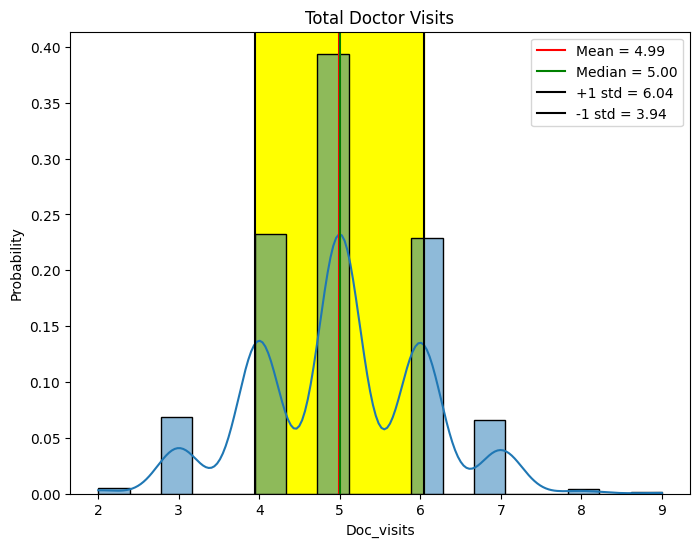

In [27]:
#plotting histogram to inspect distribution 
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(doc_visit, ax=ax, stat='probability', kde=True)
ax.axvline(mean, color='red', label=f'Mean = {mean:,.2f}')
ax.axvline(median, color='green', label=f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color='black', label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color='black', label=f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder=0)
ax.set_title('Total Doctor Visits')
ax.legend();

  ### Is it Discrete or Continuous? 
 - It appears some values have no data points, so this would be discrete
  ### Does it have a skew? If so, which direction (+/-)
  - Though values aren't accounted for, it appears to have a normal distribution visually and the mean and mode are almost the same

In [28]:
#calculating Kurtosis
kurt = stats.kurtosis(doc_visit, fisher=False)
kurt

2.9919958083381206

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
   - Well technically since it is less than 3, I will say Platykurtic, meaning a negative skew. However, it is so close, I will ask if their is wiggle room.

# Total Charged Analysis

In [29]:
#creating TotalCharge variable w/ mean, median, and STD
total_charge = df['TotalCharge'].copy()
mean = total_charge.mean()
median = total_charge.median()
std = total_charge.std()
plus_one_std = mean + std
minus_one_std = mean - std

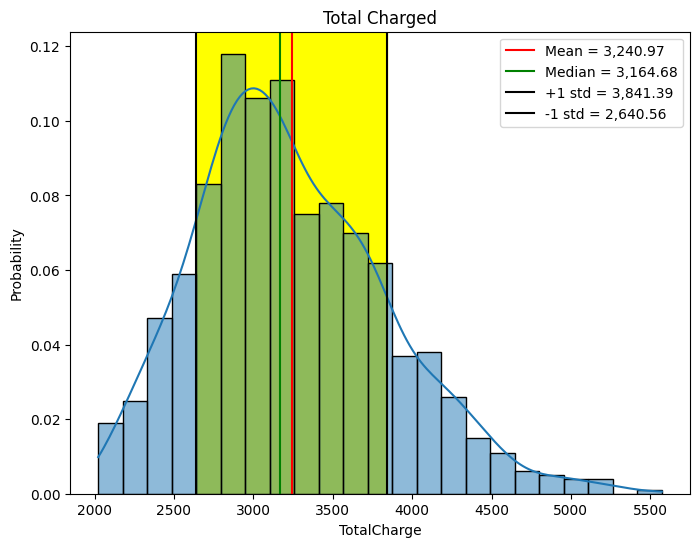

In [31]:
#plotting histogram to inspect distribution 
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(total_charge, ax=ax, stat='probability', kde=True)
ax.axvline(mean, color='red', label=f'Mean = {mean:,.2f}')
ax.axvline(median, color='green', label=f'Median = {median:,.2f}')
ax.axvline(plus_one_std, color='black', label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color='black', label=f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder=0)
ax.set_title('Total Charged')
ax.legend();

  ### Is it Discrete or Continuous? 
 - Continuous due to no gaps in distribution
  ### Does it have a skew? If so, which direction (+/-)
  - It appears visually to have a positive skew since the hump is shifted to the left. Also the difference in mean and mode.

In [32]:
#calculating Kurtosis
kurt = stats.kurtosis(total_charge, fisher=False)
kurt

3.2650077463439384

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
   - Leptokurtic, meaning a postive skew